<a href="https://colab.research.google.com/github/bvdsb01/mLearning/blob/main/SVM-IrisDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
len(iris.data)

150

In [12]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
df[df.target == 1].head() #from index 50 target 1 starts

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [15]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [16]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


# **In Machine Learning Problem two things are most important - data cleaning and data visualization**

This helps in which type of model to be used, which type of parameter to be used.

In [17]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

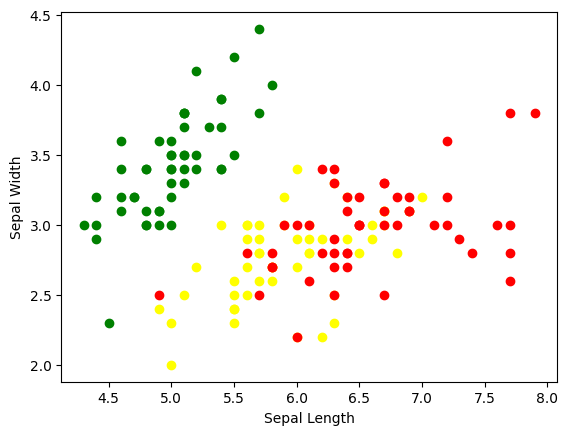

In [22]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'yellow')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'red')

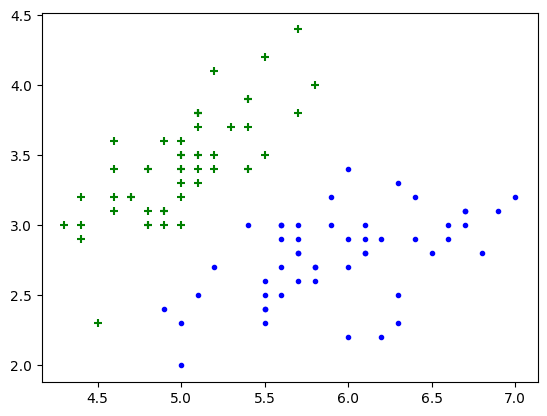

In [25]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker = '.')

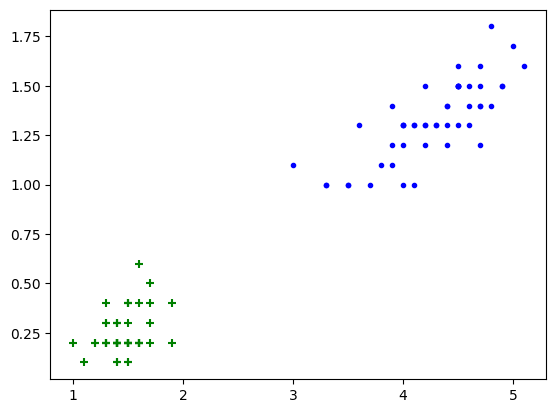

In [26]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue', marker = '.')

Based on above 2 visualization, we can simply classify no need to use kernel

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop(['flower_name','target'], axis = 'columns')
y = df.target
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
71,6.1,2.8,4.0,1.3
95,5.7,3.0,4.2,1.2
37,4.9,3.6,1.4,0.1
3,4.6,3.1,1.5,0.2
69,5.6,2.5,3.9,1.1
...,...,...,...,...
99,5.7,2.8,4.1,1.3
14,5.8,4.0,1.2,0.2
23,5.1,3.3,1.7,0.5
143,6.8,3.2,5.9,2.3


In [31]:
print(len(X_train))
print(len(X_test))

120
30


In [35]:
from sklearn.svm import SVC
model = SVC()

In [36]:
model.fit(X_train, y_train)

SVC()

In [38]:
model.score(X_test, y_test)

0.9666666666666667

In [39]:
model.predict(X_test)

array([1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1,
       1, 1, 1, 2, 2, 2, 1, 1])

In [40]:
y_test

64     1
44     0
25     0
129    2
62     1
46     0
72     1
41     0
140    2
141    2
85     1
113    2
60     1
5      0
53     1
90     1
26     0
32     0
108    2
38     0
11     0
86     1
67     1
88     1
106    2
121    2
115    2
133    2
54     1
61     1
Name: target, dtype: int64

In [41]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
64,5.6,2.9,3.6,1.3
44,5.1,3.8,1.9,0.4
25,5.0,3.0,1.6,0.2
129,7.2,3.0,5.8,1.6
62,6.0,2.2,4.0,1.0
46,5.1,3.8,1.6,0.2
72,6.3,2.5,4.9,1.5
41,4.5,2.3,1.3,0.3
140,6.7,3.1,5.6,2.4
141,6.9,3.1,5.1,2.3


In [43]:
model.predict([[5.6,	2.8,	4.9, 2.0	]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

# On tuning regularization parameter our score changes, at C= 90 it becomes 1.0

# at C = 200, score becomes 0.9333333, which means high value of C, we try to overfit the model = High Regularization

In [59]:
#tuning few parameters - like regularization

model_C = SVC(C = 200) #C's value works with trial and error no golden rule
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

# In this use case, low gamma performs better

In [70]:
#tuning gamma
model_g = SVC(gamma = 0.2)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

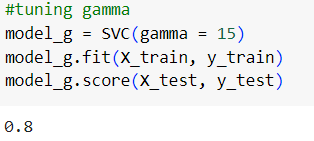

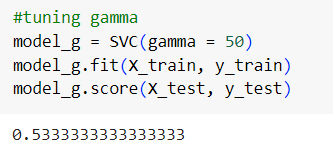

# Possible Values of Kernel = 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable.


In [71]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

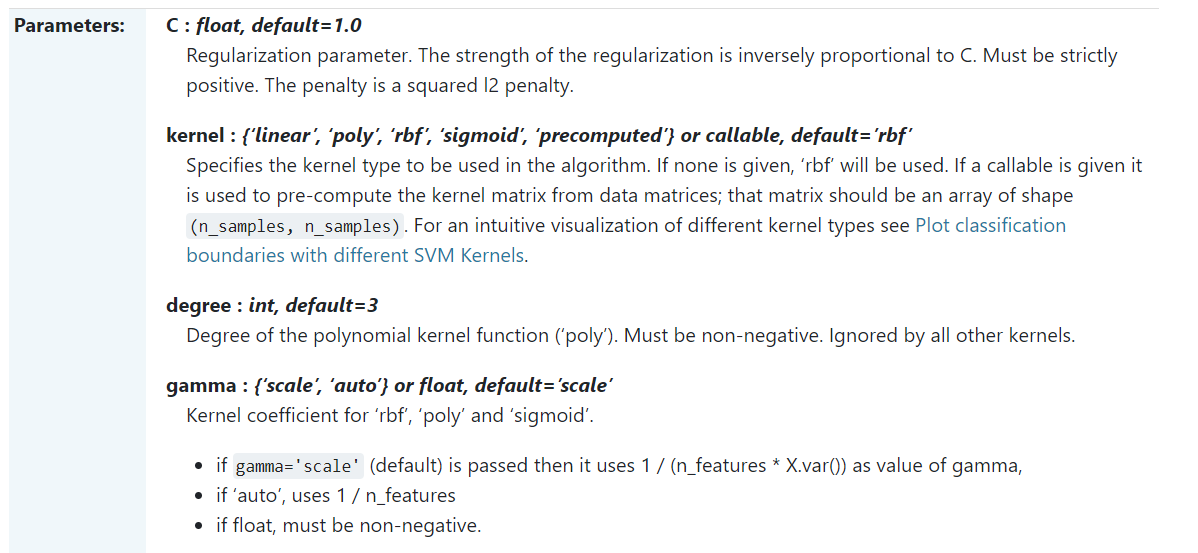

In [73]:
model_linear_kernel = SVC(kernel = 'linear')
model_linear_kernel.fit(X_train, y_train)
model_linear_kernel.score(X_test, y_test)

1.0